In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/buyerstimeprediction/Train.csv
/kaggle/input/buyerstimeprediction/Test.csv


In [2]:
train = pd.read_csv(r'/kaggle/input/buyerstimeprediction/Train.csv')
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [3]:
test = pd.read_csv(r'/kaggle/input/buyerstimeprediction/Test.csv')
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [4]:
train.shape

(5429, 9)

In [5]:
train.columns

Index(['session_id', 'session_number', 'client_agent', 'device_details',
       'date', 'purchased', 'added_in_cart', 'checked_out', 'time_spent'],
      dtype='object')

In [6]:
train.drop('session_id',axis=1,inplace=True)
test.drop('session_id',axis=1,inplace=True)

In [7]:
train['date']= pd.to_datetime(train['date'])
test['date']= pd.to_datetime(test['date'])

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_number  2327 non-null   int64         
 1   client_agent    2268 non-null   object        
 2   device_details  2327 non-null   object        
 3   date            2327 non-null   datetime64[ns]
 4   purchased       2327 non-null   int64         
 5   added_in_cart   2327 non-null   int64         
 6   checked_out     2327 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 127.4+ KB


In [9]:
train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month

In [10]:
train['date'] = train['date'].dt.dayofweek
test['date'] = test['date'].dt.dayofweek

In [11]:
train['client_agent'].nunique()

698

In [12]:
train['session_number'].nunique()

610

In [13]:
train['device_details'].unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [14]:
train['date'].nunique()

7

In [15]:
train['purchased'].unique()

array([1, 0])

In [16]:
train['added_in_cart'].unique()

array([0, 1])

In [17]:
train['checked_out'].unique()

array([0, 1])

In [18]:
train.describe()

,session_number,date,purchased,added_in_cart,checked_out,time_spent,month
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,1072.835329,2.919322,0.159145,0.162092,0.017499,663.194292,7.389759
std,1436.351474,2.067249,0.365845,0.368570,0.131132,1713.671664,3.727630
min,11.000000,0.000000,0.000000,0.000000,0.000000,14.400000,1.000000
25%,121.000000,1.000000,0.000000,0.000000,0.000000,22.699000,3.000000
50%,517.000000,3.000000,0.000000,0.000000,0.000000,98.312000,9.000000
75%,1397.000000,5.000000,0.000000,0.000000,0.000000,600.463000,10.000000
max,7722.000000,6.000000,1.000000,1.000000,1.000000,38494.025000,12.000000


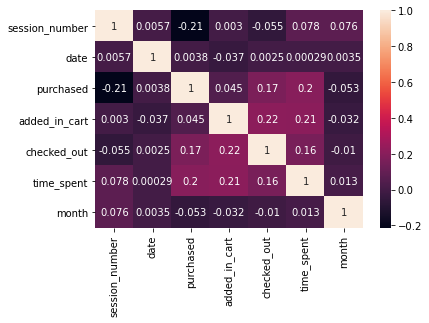

In [19]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True)

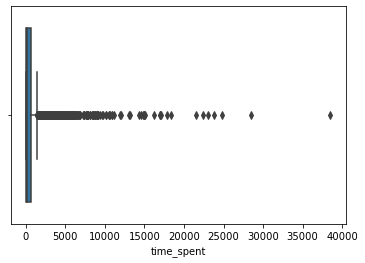

In [20]:
sns.boxplot(train['time_spent'])

In [21]:
train['time_spent'].describe([0.1,0.25,0.50,0.75,0.95,0.99,0.995])

count     5429.000000
mean       663.194292
std       1713.671664
min         14.400000
10%         19.805400
25%         22.699000
50%         98.312000
75%        600.463000
95%       2855.864600
99%       7771.287560
99.5%    10522.583480
max      38494.025000
Name: time_spent, dtype: float64

In [22]:
train = train[train['time_spent']<10000]

In [23]:
train

,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,month
0,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2,1,0,0,236.886,1
1,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,3,1,0,0,1277.455,2
2,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,3,0,0,0,21.704,8
3,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,0,1,0,455.201,12
4,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,1,0,0,0,1164.877,9
...,...,...,...,...,...,...,...,...,...
5424,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,2,0,0,0,20.601,11
5425,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,3,0,0,0,1537.666,9
5426,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,1,0,0,0,22.711,8
5427,913,NaN,Unknown - MobileWeb,1,0,0,0,20.844,6


In [24]:
train['time_spent'].describe()

count    5398.000000
mean      572.547009
std      1135.297859
min        14.400000
25%        22.633500
50%        96.164000
75%       584.703750
max      9733.961000
Name: time_spent, dtype: float64

In [25]:
train['device_details'].str.split('-')

0          [Desktop ,  Chrome]
1              [iPhone ,  iOS]
2        [iPhone ,  MobileWeb]
3              [Desktop ,  IE]
4              [iPhone ,  Web]
                 ...          
5424           [iPhone ,  Web]
5425           [iPhone ,  iOS]
5426       [Desktop ,  Chrome]
5427    [Unknown ,  MobileWeb]
5428           [iPhone ,  Web]
Name: device_details, Length: 5398, dtype: object

In [26]:
train['device_type']=train['device_details'].str.split('-').str[0]
test['device_type']=test['device_details'].str.split('-').str[0]

In [27]:
train['device_browser']=train['device_details'].str.split('-').str[1]
test['device_browser']=test['device_details'].str.split('-').str[1]

In [28]:
train['device_type'].unique()

array(['Desktop ', 'iPhone ', 'Android Phone ', 'Android Tablet ',
       'iPad ', 'Other ', 'Unknown '], dtype=object)

In [29]:
train['device_browser'].unique()

array([' Chrome', ' iOS', ' MobileWeb', ' IE', ' Web', ' Android',
       ' Firefox', ' Other', ' Safari'], dtype=object)

In [30]:
def dum_implmt(column,df):
    df_temp = pd.get_dummies(df[column], prefix=column, drop_first = True)
    df = pd.concat([df, df_temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

In [31]:
def n_dum_implmt(column,df):
    df_temp = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, df_temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

In [32]:
train = dum_implmt('device_type',train)
test = dum_implmt('device_type',test)

In [33]:
train = dum_implmt('device_browser',train)
test = dum_implmt('device_browser',test)

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['device_details'] = le.fit_transform(train['device_details'])
test['device_details'] = le.transform(test['device_details'])

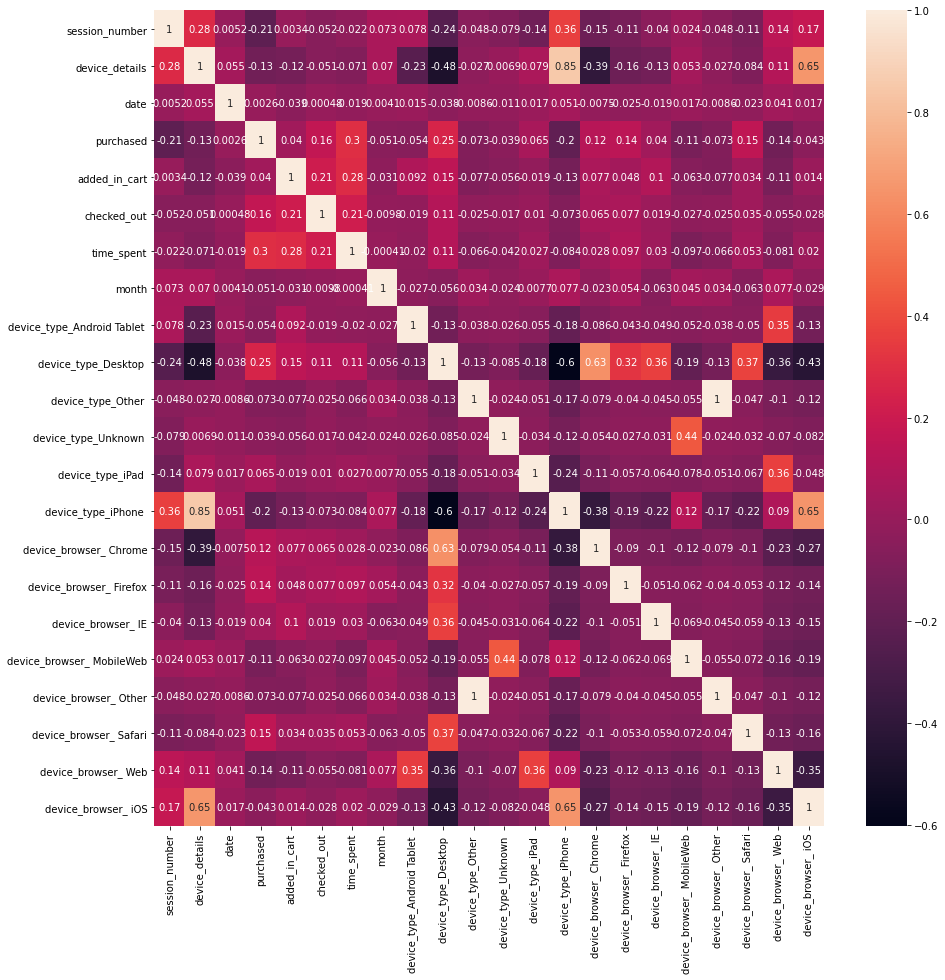

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [36]:
train.drop('device_type_Other ',axis=1,inplace=True)
test.drop('device_type_Other ',axis=1,inplace=True)

In [37]:
train.columns

Index(['session_number', 'client_agent', 'device_details', 'date', 'purchased',
       'added_in_cart', 'checked_out', 'time_spent', 'month',
       'device_type_Android Tablet ', 'device_type_Desktop ',
       'device_type_Unknown ', 'device_type_iPad ', 'device_type_iPhone ',
       'device_browser_ Chrome', 'device_browser_ Firefox',
       'device_browser_ IE', 'device_browser_ MobileWeb',
       'device_browser_ Other', 'device_browser_ Safari',
       'device_browser_ Web', 'device_browser_ iOS'],
      dtype='object')

In [38]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')

In [39]:
# train.set_index('date',inplace=True)
# test.set_index('date',inplace=True)

In [40]:
# train.sort_index(inplace=True)
# test.sort_index(inplace=True)

In [41]:
import plotly.express as px
fig = px.line(train,x=train.index,y='time_spent',title='time_spent vs date')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5398 entries, 0 to 5428
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   session_number             5398 non-null   int64  
 1   client_agent               5238 non-null   object 
 2   device_details             5398 non-null   int64  
 3   date                       5398 non-null   int64  
 4   purchased                  5398 non-null   int64  
 5   added_in_cart              5398 non-null   int64  
 6   checked_out                5398 non-null   int64  
 7   time_spent                 5398 non-null   float64
 8   month                      5398 non-null   int64  
 9   device_type_AndroidTablet  5398 non-null   uint8  
 10  device_type_Desktop        5398 non-null   uint8  
 11  device_type_Unknown        5398 non-null   uint8  
 12  device_type_iPad           5398 non-null   uint8  
 13  device_type_iPhone         5398 non-null   uint8

In [43]:
train['client_agent'].value_counts()

Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201                               200
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                                                  163
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                                         148
Product/4.7.0 iPhone/8.1.2                                                                                                                   144
Product/4.2.0 iPhone/7.1.1                                                                                                                   132
                                                                                                                                            ... 
Product/6.0 iPhone/8.2                                                                                                            

In [44]:
train['browser']=train['client_agent'].str.split(' ').str[0].str.split('/').str[0]
test['browser']=test['client_agent'].str.split(' ').str[0].str.split('/').str[0]

In [45]:
l = list(train['browser'].values)
ll= list(test['browser'].values)
kk = [item for item in l if item not in ll]
kk

['Safari', 'Dalvik']

In [46]:
train['version']=train['client_agent'].str.split(' ').str[0].str.split('/').str[1]
test['version']=test['client_agent'].str.split(' ').str[0].str.split('/').str[1]

In [47]:
train['version'] = train['version'].astype(str)
test['version'] = test['version'].astype(str)

In [48]:
train['version'].value_counts()

5.0          3162
4.7.0         275
nan           192
4.2.0         183
4.1.1         140
             ... 
160387          2
2.1.0           1
4.5.0           1
319             1
6533.21.1       1
Name: version, Length: 68, dtype: int64

In [49]:
train['version'] = train['version'].str.replace('nan','0')
test['version'] = test['version'].str.replace('nan','0')

In [50]:
train['version'] = train['version'].str.replace('.','').astype(int)
test['version'] = test['version'].str.replace('.','').astype(int)

In [51]:
train['client_bracket'] = train['client_agent'].str.split('(').str[1].str.split(')').str[0]
test['client_bracket'] = test['client_agent'].str.split('(').str[1].str.split(')').str[0]

In [52]:
train['client_bracket']

0                                   Windows NT 6.1; WOW64
1                                                     NaN
2               iPhone; CPU iPhone OS 7_1_2 like Mac OS X
3       compatible; MSIE 9.0; Windows NT 6.1; WOW64; T...
4               iPhone; CPU iPhone OS 7_1_1 like Mac OS X
                              ...                        
5424              iPhone; CPU iPhone OS 8_1 like Mac OS X
5425                                                  NaN
5426                     Macintosh; Intel Mac OS X 10_9_4
5427                                                  NaN
5428            iPhone; CPU iPhone OS 7_0_4 like Mac OS X
Name: client_bracket, Length: 5398, dtype: object

In [53]:
train['client_bracket'].fillna("NAN",inplace=True)

In [54]:
test['client_bracket'].fillna("NAN",inplace=True)

In [55]:
train['client_bracket'] = train['client_bracket'].str.replace("Trident","Tri")

In [56]:
test['client_bracket'] = test['client_bracket'].str.replace("Trident","Tri")

In [57]:
regular_list = list(train['client_bracket'].str.split(";").values)

In [58]:
regular_list

[['Windows NT 6.1', ' WOW64'],
 ['NAN'],
 ['iPhone', ' CPU iPhone OS 7_1_2 like Mac OS X'],
 ['compatible', ' MSIE 9.0', ' Windows NT 6.1', ' WOW64', ' Tri/5.0'],
 ['iPhone', ' CPU iPhone OS 7_1_1 like Mac OS X'],
 ['NAN'],
 ['Windows NT 6.1', ' WOW64', ' rv:30.0'],
 ['Windows NT 6.3', ' WOW64', ' Tri/7.0', ' Touch', ' rv:11.0'],
 ['NAN'],
 ['Windows NT 6.1', ' WOW64'],
 ['NAN'],
 ['iPhone', ' CPU iPhone OS 7_1_2 like Mac OS X'],
 ['Windows NT 6.3', ' WOW64', ' Tri/7.0', ' Touch', ' rv:11.0'],
 ['iPad', ' CPU OS 7_1_2 like Mac OS X'],
 ['Macintosh', ' Intel Mac OS X 10_9_5'],
 ['Windows NT 6.1', ' WOW64'],
 ['NAN'],
 ['NAN'],
 ['NAN'],
 ['Macintosh', ' Intel Mac OS X 10_8_2'],
 ['iPhone', ' CPU iPhone OS 8_1 like Mac OS X'],
 ['Windows NT 6.3', ' WOW64', ' Tri/7.0', ' rv:11.0'],
 ['NAN'],
 ['iPad', ' CPU OS 8_0_2 like Mac OS X'],
 ['Windows NT 6.1', ' WOW64', ' Tri/7.0', ' rv:11.0'],
 ['Windows NT 6.1', ' WOW64'],
 ['NAN'],
 ['NAN'],
 ['Macintosh', ' Intel Mac OS X 10_10'],
 ['NAN'],
 

In [59]:
temp = [incom for incom in regular_list if str(incom) != 'NAN']

In [60]:
temp1 = [item for sublist in temp for item in sublist]

In [61]:
temp = set(temp1)

In [62]:
temp = [x.strip(' ') for x in temp]

In [63]:
temp

['Nexus 7 Build/KTU84P',
 'Windows NT 6.1',
 'LG-D855 Build/KVT49L.A1407411578',
 'Tri/5.0',
 '.NET4.0E',
 'Linux',
 'CPU OS 7_1_1 like Mac OS X',
 'GT-N7100 Build/JSS15J',
 '.NET4.0C',
 'GT-P5110 Build/JDQ39',
 'rv:24.0',
 '.NET CLR 3.5.30729',
 'rv:28.0',
 'CPU iPhone OS 6_0_1 like Mac OS X',
 'Windows NT 6.3',
 'Nexus 5 Build/LRX21O',
 'CPU iPhone OS 8_0 like Mac OS X',
 'HTC_PN071 Build/KTU84L',
 'CPU OS 8_2 like Mac OS X',
 'Intel Mac OS X 10_8_5',
 'GT-I8190 Build/JZO54K',
 'Intel Mac OS X 10_8_4',
 'Tablet PC 2.0',
 '.NET CLR 3.0.30729',
 '.NET CLR 2.0.50727',
 'CPU iPhone OS 7_1 like Mac OS X',
 'Android 4.1.1',
 'Intel Mac OS X 10_9_2',
 'Lead 3 Build/KOT49H',
 'CPU iPhone OS 7_0_3 like Mac OS X',
 'Windows NT 6.0',
 '.NET CLR 3.0.4506.2152',
 'Tri/6.0',
 'Mobile',
 'OfficeLiveConnector.1.5',
 'GT-N7105T Build/JRO03C',
 'X11',
 'SAMSUNG GT-I9300/I9300XXUGNA5 Build/JSS15J',
 'HUAWEI Y300-0151 Build/HuaweiY300-0151',
 'MS-RTC S',
 'en-au',
 'rv:16.0',
 'SLCC2',
 'MATP',
 'GT-I91

In [64]:
l = []
for val in temp:
    l.append(val.split(" ")[0])

In [65]:
uniq = list(set(l))

In [66]:
l = []
for val in uniq:
    l.append(val.split(":")[0])

In [67]:
uniq = list(set(l))

In [68]:
l = []
for val in uniq:
    l.append(val.split("-")[0])

In [69]:
uniq = list(set(l))

In [70]:
l = []
for val in uniq:
    l.append(val.split("/")[0])

In [71]:
uniq = list(set(l))

In [72]:
l = []
for val in uniq:
    l.append(val.split("_")[0])

In [73]:
uniq = list(set(l))

In [74]:
len(uniq)

63

In [75]:
for i in uniq:
    train[uniq]=0

In [76]:
for i in uniq:
    test[uniq]=0

In [77]:
train.columns

Index(['session_number', 'client_agent', 'device_details', 'date', 'purchased',
       'added_in_cart', 'checked_out', 'time_spent', 'month',
       'device_type_AndroidTablet', 'device_type_Desktop',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'device_browser_Chrome', 'device_browser_Firefox', 'device_browser_IE',
       'device_browser_MobileWeb', 'device_browser_Other',
       'device_browser_Safari', 'device_browser_Web', 'device_browser_iOS',
       'browser', 'version', 'client_bracket', 'SE', 'NAN', 'D6653', 'U',
       'Macintosh', 'CrOS', 'LG', 'i386', 'WebView', 'InfoPath.3', 'HTC', 'MS',
       'Linux', 'Intel', 'MDDCJS', 'SAMSUNG', 'ZTE', '.NET',
       'OfficeLiveConnector.1.5', 'managedpc', 'de', 'Windows', 'Touch',
       'InfoPath.2', 'GTB7.5', '.NET4.0C', 'x64', 'iPhone', 'Tri', 'C6603',
       'MAARJS', 'BRI', 'Media', 'SLCC1', 'Lead', 'TAJB', 'Tablet', 'CPU',
       'iPad', 'rv', 'WOW64', 'BN', 'compatible', 'HUAWEI', 'GT', 'ASU2JS'

In [78]:
for i in uniq:
    for k,j in enumerate(train['client_bracket']):
        if i in j:
            train[i].iloc[k]=1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
for i in uniq:
    for k,j in enumerate(test['client_bracket']):
        if i in j:
            test[i].iloc[k]=1

In [80]:
train['count'] = train['client_bracket'].str.count(';')
test['count'] = test['client_bracket'].str.count(';')

In [81]:
train['count'].fillna(0,inplace=True)
test['count'].fillna(0,inplace=True)

In [82]:
train['count'] = train['count'].astype(int)
test['count'] = test['count'].astype(int)

In [83]:
train['kit_type'] = train['client_agent'].str.split(')').str[1].str.split('/').str[0]
test['kit_type'] = test['client_agent'].str.split(')').str[1].str.split('/').str[0]

In [84]:
train['kit_type'].fillna('NA',inplace=True)
test['kit_type'].fillna('NA',inplace=True)

In [85]:
train.head()

,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,month,device_type_AndroidTablet,...,iPod,.NET4.0E,OfficeLivePatch.1.3,ms,Mobile,Android,MATP,MSIE,count,kit_type
0,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6,2,1,0,0,236.886,1,0,...,0,0,0,0,0,0,0,0,1,AppleWebKit
1,55,Product/8.0 iPhone/8.1.3,16,3,1,0,0,1277.455,2,0,...,0,0,0,0,0,0,0,0,0,NA
2,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,14,3,0,0,0,21.704,8,0,...,0,0,0,0,0,0,0,0,1,AppleWebKit
3,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,8,0,0,1,0,455.201,12,0,...,0,0,0,0,0,0,0,1,4,
4,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,15,1,0,0,0,1164.877,9,0,...,0,0,0,0,0,0,0,0,1,AppleWebKit


In [86]:
test.head()

,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,month,device_type_AndroidTablet,device_type_Desktop,...,iPod,.NET4.0E,OfficeLivePatch.1.3,ms,Mobile,Android,MATP,MSIE,count,kit_type
0,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,8,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,3,like Gecko
1,935,Product/160393 Android/4.3 Device/samsung_GT-I...,0,3,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,NA
2,902,Product/4.2.2 iPhone/7.1.2,16,0,1,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,NA
3,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,8,6,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,4,
4,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,6,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,AppleWebKit


In [87]:
train.drop('client_agent',axis=1,inplace=True)
test.drop('client_agent',axis=1,inplace=True)

In [88]:
train.drop('client_bracket',axis=1,inplace=True)
test.drop('client_bracket',axis=1,inplace=True)

In [89]:
train.browser.value_counts()

Mozilla      3140
Product      2058
Typhoeus       26
-unknown-       6
Opera           6
Dalvik          1
Safari          1
Name: browser, dtype: int64

In [90]:
train = n_dum_implmt('browser',train)
test = n_dum_implmt('browser',test)

In [91]:
train.drop('browser_Safari',axis=1,inplace=True)
train.drop('browser_Dalvik',axis=1,inplace=True)

In [92]:
train.shape

(5398, 92)

In [93]:
test.shape

(2327, 91)

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5398 entries, 0 to 5428
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   session_number             5398 non-null   int64  
 1   device_details             5398 non-null   int64  
 2   date                       5398 non-null   int64  
 3   purchased                  5398 non-null   int64  
 4   added_in_cart              5398 non-null   int64  
 5   checked_out                5398 non-null   int64  
 6   time_spent                 5398 non-null   float64
 7   month                      5398 non-null   int64  
 8   device_type_AndroidTablet  5398 non-null   uint8  
 9   device_type_Desktop        5398 non-null   uint8  
 10  device_type_Unknown        5398 non-null   uint8  
 11  device_type_iPad           5398 non-null   uint8  
 12  device_type_iPhone         5398 non-null   uint8  
 13  device_browser_Chrome      5398 non-null   uint8

In [95]:
train.kit_type.values

array([' AppleWebKit', 'NA', ' AppleWebKit', ..., ' AppleWebKit', 'NA',
       ' AppleWebKit'], dtype=object)

In [96]:
train['kit_type']  = train['kit_type'].str.replace("like ","")

In [97]:
temp1 = list(train.kit_type.values)

In [98]:
temp1.remove("")

In [99]:
temp1.remove("NA")

In [100]:
temp1 = ['Gecko','AppleWebKit']

In [101]:
train['Gecko']=0
train['AppleWebKit']=0
test['Gecko']=0
test['AppleWebKit']=0

In [102]:
for i in temp1:
    for k,j in enumerate(train['kit_type']):
        if i in j:
            train[i].iloc[k]=1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
for i in temp1:
    for k,j in enumerate(test['kit_type']):
        if i in j:
            test[i].iloc[k]=1

In [104]:
train.drop('kit_type',axis=1,inplace=True)
test.drop('kit_type',axis=1,inplace=True)

In [105]:
conditions= [(train["purchased"]==0) & (train["added_in_cart"]==0) &(train["checked_out"]==0),
           (train["purchased"]==0) & (train["added_in_cart"]==0) &(train["checked_out"]==1),
           (train["purchased"]==0) & (train["added_in_cart"]==1) &(train["checked_out"]==0),
           (train["purchased"]==0) & (train["added_in_cart"]==1) &(train["checked_out"]==1),
           (train["purchased"]==1) & (train["added_in_cart"]==0) &(train["checked_out"]==0),
           (train["purchased"]==1) & (train["added_in_cart"]==0) &(train["checked_out"]==1),
           (train["purchased"]==1) & (train["added_in_cart"]==1) &(train["checked_out"]==0),
           (train["purchased"]==1) & (train["added_in_cart"]==1) &(train["checked_out"]==1)]

values = ['no_activity', 'chk', 'add', 'add_chk','purc','purc_chk','purc_add','purc_add_chk']

In [106]:
train['customer_activity'] = np.select(conditions, values)

In [107]:
conditions_t= [(test["purchased"]==0) & (test["added_in_cart"]==0) &(test["checked_out"]==0),
           (test["purchased"]==0) & (test["added_in_cart"]==0) &(test["checked_out"]==1),
           (test["purchased"]==0) & (test["added_in_cart"]==1) &(test["checked_out"]==0),
           (test["purchased"]==0) & (test["added_in_cart"]==1) &(test["checked_out"]==1),
           (test["purchased"]==1) & (test["added_in_cart"]==0) &(test["checked_out"]==0),
           (test["purchased"]==1) & (test["added_in_cart"]==0) &(test["checked_out"]==1),
           (test["purchased"]==1) & (test["added_in_cart"]==1) &(test["checked_out"]==0),
           (test["purchased"]==1) & (test["added_in_cart"]==1) &(test["checked_out"]==1)]

values_t = ['no_activity', 'chk', 'add', 'add_chk','purc','purc_chk','purc_add','purc_add_chk']

In [108]:
test['customer_activity'] = np.select(conditions_t, values_t)

In [109]:
train = dum_implmt('customer_activity',train)
test = dum_implmt('customer_activity',test)

In [110]:
y = train.pop('time_spent')
X = train

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
#Importing required libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [109]:
from sklearn.preprocessing import MinMaxScaler
ll = list(X_train.columns)
scaling = MinMaxScaler()
X_train[ll] = scaling.fit_transform(X_train[ll])
X_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,session_number,device_details,date,purchased,added_in_cart,checked_out,month,device_type_AndroidTablet,device_type_Desktop,device_type_Unknown,...,U,X11,count,browser_-unknown-,browser_Mozilla,browser_Opera,browser_Product,browser_Typhoeus,Gecko,AppleWebKit
2040,0.055635,1.0000,0.333333,0.0,1.0,0.0,0.636364,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4929,0.035663,0.0000,0.666667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2693,0.059914,0.7500,0.833333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.071429,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1689,0.378031,0.3125,1.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.285714,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3704,0.000000,0.3750,0.166667,1.0,0.0,0.0,0.272727,0.0,1.0,0.0,...,0.0,0.0,0.071429,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [130]:
X_test[ll] = scaling.transform(X_test[ll])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
# list of alpha range to tune for ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation taking folds as 10
folds = 10
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)          
#Fitting the model on train set after K-fold cross validation
model_ridge.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.7s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
#Collecting results in a dataframe named ridge_results
ridge_results = pd.DataFrame(model_ridge.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005610,0.001872,0.002315,0.000257,0.0001,{'alpha': 0.0001},-545.932363,-575.811317,-497.585077,-1018.138911,...,-540.556000,-533.830680,-531.963753,-540.720505,-530.009993,-518.703339,-534.732546,-539.902113,-534.648075,6.984612
1,0.004820,0.000083,0.002173,0.000045,0.001,{'alpha': 0.001},-508.182370,-574.382627,-496.570790,-636.042585,...,-541.560368,-534.590875,-532.464700,-541.523848,-530.418909,-519.261230,-535.538019,-540.858905,-535.419871,7.113265
2,0.005019,0.000463,0.002241,0.000247,0.01,{'alpha': 0.01},-502.458842,-574.187880,-496.227261,-556.279757,...,-541.765337,-534.821379,-532.586250,-541.737234,-530.650539,-519.381547,-535.722312,-541.059082,-535.611370,7.134405
3,0.004837,0.000066,0.002172,0.000048,0.05,{'alpha': 0.05},-502.763418,-574.261197,-495.537982,-548.518169,...,-541.834072,-534.899153,-532.666008,-541.883416,-530.925638,-519.473160,-535.843964,-541.141359,-535.721290,7.124260
4,0.004825,0.000058,0.002146,0.000038,0.1,{'alpha': 0.1},-502.682150,-574.301080,-494.979840,-547.502279,...,-541.887248,-534.937543,-532.714797,-541.963976,-531.065176,-519.545559,-535.949187,-541.186884,-535.788249,7.115951


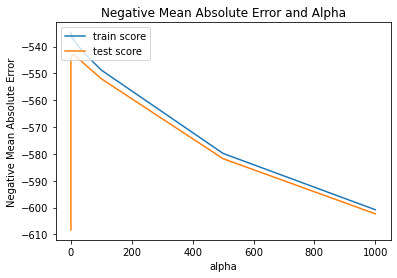

In [113]:
# plotting mean test and train scores with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int64')

# plotting the graph to get optimal value of alpha
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [114]:
print("Best alpha obtained from above graph: ",model_ridge.best_params_)

Best alpha obtained from above graph:  {'alpha': 8.0}


In [115]:
alpha = 8
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train, y_train)
ridge_final.coef_

array([ 192.32783408, -201.00997489,  -56.40372482,  828.39783275,
        737.05522725,  571.76067052,   49.20551071,  117.30571066,
         17.49596454,   23.2342131 ,    8.96687572,  -78.3397429 ,
       -125.62395316,   83.77332582,   54.47634506, -235.73313449,
       -303.4106779 ,    4.87024682,  -85.45054366,   85.58583212,
         -5.34162836,  -92.06570016,  -59.99920319,  -92.48205089,
        -32.93725981,   24.69826897,  290.12272448,   -9.30429949,
          0.        ,  -41.19683815, -111.05340147,    3.07006368,
         32.06047341,  -92.48205089,   22.86180358,   69.05645098,
         40.47836162,  -32.24445813,    0.        ,    0.        ,
          0.        ,   25.84832595,  -16.90190583,  -86.78627309,
         -7.69577213,   -1.36689907,    3.38012542,  -59.99920319,
        -53.45609168,   25.84832595,  -70.99269921,   25.84832595,
        -32.42393265,   -6.88122344,  -34.33231473,  -53.15771683,
        408.79770232,  -53.14087043,  -79.49986915,  -47.22401

In [116]:
#Printing ridge score on train and test dataset
print("Ridge score on train dataset:",ridge_final.score(X_train,y_train))
print("Ridge score on test dataset",ridge_final.score(X_test,y_test))

Ridge score on train dataset: 0.21653476448696662
Ridge score on test dataset -178007.13604863174


In [124]:
lasso = Lasso()

# list of alpha range to tune for lasso regression
params = {'alpha': [ 0.5,0.6,.7,0.8,0.9,1,2,4,5,10,20,50,100]}

# cross validation using folds as 10
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#Fitting the model on train set after K-fold cross validation
model_lasso.fit(X_train, y_train) 

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.9s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 4, 5, 10, 20,
                                   50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.043176,0.038482,0.002319,0.000149,0.5,{'alpha': 0.5},-499.209380,-570.974793,-490.717455,-543.294476,...,-543.048317,-535.720309,-533.769052,-543.901043,-532.202839,-521.910825,-537.339526,-542.204690,-537.114568,6.893954
1,0.032301,0.020774,0.002226,0.000097,0.6,{'alpha': 0.6},-499.005438,-570.777459,-490.956437,-542.953356,...,-543.339988,-536.010957,-534.076617,-544.265381,-532.607828,-522.462138,-537.637563,-542.686602,-537.493707,6.863331
2,0.023391,0.003466,0.002225,0.000124,0.7,{'alpha': 0.7},-498.566613,-570.686630,-491.062986,-542.865157,...,-543.598068,-536.264412,-534.427607,-544.571680,-532.946669,-522.918905,-537.974005,-543.087339,-537.843326,6.840602
3,0.023824,0.005360,0.002304,0.000112,0.8,{'alpha': 0.8},-497.943262,-570.771164,-491.166770,-542.733924,...,-543.756736,-536.516401,-534.656344,-544.760130,-533.208619,-523.157989,-538.286010,-543.384289,-538.097847,6.845837
4,0.021834,0.004715,0.002265,0.000107,0.9,{'alpha': 0.9},-497.426484,-570.935837,-491.342511,-542.695700,...,-543.939591,-536.676909,-534.822054,-544.923253,-533.361986,-523.312881,-538.491420,-543.561046,-538.277167,6.857806


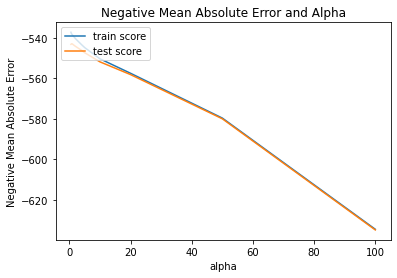

In [126]:
# plotting mean test and train scores with alpha 
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

# plotting the graph to get optimal value of alpha
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [127]:
#Finding best value of alpha based on above graph and then setting that alpha value to form the model based on train dataset
print("Best value of alpha obtained: ",model_lasso.best_params_)

Best value of alpha obtained:  {'alpha': 0.8}


In [128]:
alpha = 0.8
lasso_final = Lasso(alpha=alpha)
lasso_final.fit(X_train, y_train)
print(lasso_final.coef_)

[ 1.64964969e+02 -5.64370069e+01 -5.22822329e+01  8.37025484e+02
  7.44713896e+02  5.84536851e+02  4.15321182e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.13958897e+02
 -8.78711313e+01  6.39180499e+01 -0.00000000e+00 -2.59638285e+02
 -3.26514573e+02  0.00000000e+00 -1.08278182e+02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -7.97574588e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.38394784e+02 -0.00000000e+00
  0.00000000e+00 -1.66284692e+01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.52906683e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.60333964e+02 -0.00000000e+00 -5.72307586e+01 -0.00000000e+00
 -0.00000000e+00 -1.15136

In [129]:
#Printing lasso score on train and test dataset
print("Lasso score on train dataset: ",lasso_final.score(X_train,y_train))

Lasso score on train dataset:  0.21449792679595903


In [135]:
from sklearn.metrics import mean_squared_error
print("Root Mean Squared error for ridge regression: ",np.sqrt(mean_squared_error(y_test,model_ridge.predict(X_test))))
print("Root Mean Squared error for lasso regression: ",np.sqrt(mean_squared_error(y_test,model_lasso.predict(X_test))))

Root Mean Squared error for ridge regression:  838.7654407643863
Root Mean Squared error for lasso regression:  839.4070873629577


In [107]:
# X_train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [108]:
# test = test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [109]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# X_train['browser']=X_train['browser'].astype(str)
# # X_train['client_bracket']=X_train['client_bracket'].astype(str)
# X_train['kit_type']=X_train['kit_type'].astype(str)
# test['browser']=test['browser'].astype(str)
# # test['client_bracket']=test['client_bracket'].astype(str)
# test['kit_type']=test['kit_type'].astype(str)

# X_train['browser'] = le.fit_transform(X_train['browser'])
# test['browser'] = le.transform(test['browser'])
# le = preprocessing.LabelEncoder()
# # X_train['client_bracket'] = le.fit_transform(X_train['client_bracket'])
# # test['client_bracket'] = le.transform(test['client_bracket'])
# le = preprocessing.LabelEncoder()
# X_train['kit_type'] = le.fit_transform(X_train['kit_type'])
# test['kit_type'] = le.transform(test['kit_type'])

In [112]:
from xgboost import XGBRegressor
xgb_clf = XGBRegressor(tree_method='gpu_hist')

parameters = {"learning_rate": [0.01,0.05],
               "gamma" : [ 0.1,0.3],
               "max_depth": [3,4,5],
               "colsample_bytree": [ 0.6],
               "subsample": [0.5],
               "reg_alpha": [0, 0.5],
               "reg_lambda": [1, 1.5],
               "min_child_weight": [3,4, 5],
               "n_estimators": [10,20,25]}

from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "neg_mean_squared_log_error",
                             cv = 3, random_state = 42,n_jobs=-1)

# Fit the model
model_xgboost = xgb_rscv.fit(X_train, y_train)

# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

Learning Rate:  0.01
Gamma:  0.3
Max Depth:  4
Subsample:  0.5
Max Features at Split:  0.6
Alpha:  0.5
Lamda:  1.5
Minimum Sum of the Instance Weight Hessian to Make a Child:  4
Number of Trees:  25


In [113]:
from xgboost import XGBRegressor
xgb = XGBRegressor(tree_method='gpu_hist',learning_rate=0.01,gamma=0.3,max_depth=4,subsample=0.5,colsample_bytree=0.6,
                      reg_alpha=0.5,reg_lambda=1.5,min_child_weight=4,n_estimators=25)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan,
             monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
             n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.5, reg_lambda=1.5, scale_pos_weight=1, subsample=0.5,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [116]:
preds = xgb.predict(test)

In [115]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
print(np.sqrt(mean_squared_log_error(y_test, preds)))
print(np.sqrt(mean_squared_error(y_test, preds)))

1.477692950133791
1232.8712594118513


In [141]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(task_type='GPU',iterations=150, depth=8, learning_rate=0.05, eval_metric = 'RMSE')
model.fit(X_train, y_train)

0:	learn: 1019.4437321	total: 16ms	remaining: 2.38s
1:	learn: 1009.8118373	total: 22.2ms	remaining: 1.64s
2:	learn: 1000.5509782	total: 28.2ms	remaining: 1.38s
3:	learn: 992.1702215	total: 34.4ms	remaining: 1.25s
4:	learn: 984.0878036	total: 40.7ms	remaining: 1.18s
5:	learn: 976.5697554	total: 47ms	remaining: 1.13s
6:	learn: 969.0680118	total: 53.1ms	remaining: 1.08s
7:	learn: 962.4667767	total: 59.3ms	remaining: 1.05s
8:	learn: 956.5665802	total: 65.7ms	remaining: 1.03s
9:	learn: 950.7321854	total: 71.8ms	remaining: 1s
10:	learn: 944.9231040	total: 78.1ms	remaining: 986ms
11:	learn: 939.8501117	total: 84.3ms	remaining: 969ms
12:	learn: 934.7561781	total: 90.3ms	remaining: 952ms
13:	learn: 929.5909494	total: 96.8ms	remaining: 940ms
14:	learn: 925.3658532	total: 103ms	remaining: 928ms
15:	learn: 921.3825617	total: 109ms	remaining: 915ms
16:	learn: 917.5264251	total: 115ms	remaining: 903ms
17:	learn: 914.0256173	total: 122ms	remaining: 892ms
18:	learn: 910.3455982	total: 128ms	remaining:

In [142]:
preds1 = model.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
print(np.sqrt(mean_squared_log_error(y_test, preds1)))
print(np.sqrt(mean_squared_error(y_test, preds1)))

1.7874878405804238
819.4192975214339


In [119]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators =300)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
print(np.sqrt(mean_squared_log_error(y_test, y_predict)))
print(np.sqrt(mean_squared_error(y_test, y_predict)))

1.7569557911681082
1804.0811047654156


In [144]:
from mlxtend.regressor import StackingCVRegressor

# clf = XGBRegressor(tree_method='gpu_hist',learning_rate=0.01,gamma=0.5,max_depth=6,subsample=0.6,colsample_bytree=0.6,
#                       reg_alpha=0.5,reg_lambda=1.5,min_child_weight=6,n_estimators=25) 
clf = Ridge(alpha=8)

lr = CatBoostRegressor(task_type='GPU',iterations=150, depth=8, learning_rate=0.05, eval_metric = 'RMSE')

sclf = StackingCVRegressor(regressors=[clf],
                            meta_regressor=lr, cv=3, use_features_in_secondary=True,
                            random_state=42)
sclf.fit(X_train,y_train)

0:	learn: 1019.4695046	total: 25ms	remaining: 3.73s
1:	learn: 1010.0271417	total: 31.9ms	remaining: 2.36s
2:	learn: 1001.2711517	total: 38.8ms	remaining: 1.9s
3:	learn: 993.1633185	total: 46.6ms	remaining: 1.7s
4:	learn: 984.8739599	total: 53.5ms	remaining: 1.55s
5:	learn: 977.5245284	total: 60.3ms	remaining: 1.45s
6:	learn: 970.1648506	total: 67ms	remaining: 1.37s
7:	learn: 964.1583606	total: 73.8ms	remaining: 1.31s
8:	learn: 958.4157095	total: 80.8ms	remaining: 1.27s
9:	learn: 952.9378099	total: 87.8ms	remaining: 1.23s
10:	learn: 947.8899389	total: 94.8ms	remaining: 1.2s
11:	learn: 942.9685892	total: 102ms	remaining: 1.17s
12:	learn: 938.3954512	total: 108ms	remaining: 1.14s
13:	learn: 933.9846815	total: 118ms	remaining: 1.15s
14:	learn: 929.9117918	total: 124ms	remaining: 1.12s
15:	learn: 925.9008247	total: 131ms	remaining: 1.09s
16:	learn: 922.3610687	total: 137ms	remaining: 1.07s
17:	learn: 919.0709249	total: 143ms	remaining: 1.05s
18:	learn: 914.9641210	total: 149ms	remaining: 1.

StackingCVRegressor(cv=3,
                    meta_regressor=<catboost.core.CatBoostRegressor object at 0x7f6772227d10>,
                    random_state=42, regressors=[Ridge(alpha=8)],
                    use_features_in_secondary=True)

In [145]:
preds2 = sclf.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
print(np.sqrt(mean_squared_log_error(y_test, preds2)))
print(np.sqrt(mean_squared_error(y_test, preds2)))

1.7818841455618173
820.9351707097436


In [117]:
final_pred=pd.DataFrame(preds)

In [118]:
final_pred.rename(columns={ final_pred.columns[0]: "time_spent"}, inplace = True)

In [119]:
final_pred.to_csv('submission_9.csv',index=False)

In [ ]:
min(test.index)

In [ ]:
max(test.index)

In [ ]:
min(train.index)

In [ ]:
max(train.index)